In [30]:
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from PIL import Image
import numpy as np

In [31]:
(xtr, ytr), (xte, yte) = cifar10.load_data()

In [32]:
xtr.shape

(50000, 32, 32, 3)

In [10]:
image = np.array(Image.open(r'me.jpg'))

In [13]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

In [14]:
result_img = cv2.filter2D(image, cv2.CV_64F, kernel)

In [16]:
result_img = cv2.convertScaleAbs(result_img)

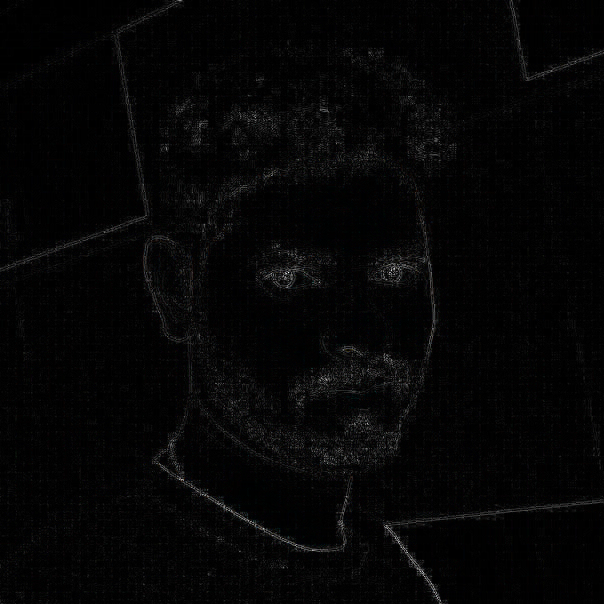

In [17]:
Image.fromarray(result_img)

In [22]:
xtr = xtr.reshape(xtr.shape[0], xtr.shape[1], xtr.shape[2], 1).astype('float32')/255
xte = xte.reshape(xte.shape[0], xte.shape[1], xte.shape[2], 1).astype('float32')/255

In [23]:
ytr = to_categorical(ytr)
yte = to_categorical(yte)

In [24]:
model = Sequential([

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')

])

/opt/anaconda3/envs/classes/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(xtr, ytr, validation_data=(xte, yte), epochs=10, batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7745 - loss: 0.7287 - val_accuracy: 0.9711 - val_loss: 0.0959
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9659 - loss: 0.1067 - val_accuracy: 0.9755 - val_loss: 0.0798
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9791 - loss: 0.0663 - val_accuracy: 0.9814 - val_loss: 0.0564
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9830 - val_loss: 0.0561
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9851 - val_loss: 0.0519
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9906 - loss: 0.0326 - val_accuracy: 0.9845 - val_loss: 0.0492
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9898 - loss: 0.0299 - val_accuracy: 0.9866 - val_loss: 0.0487
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9935 - loss: 0.0211 - 